In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

def visualize_output(csv_files):
    """
    Visualize list of Q8.8 CSV files as 3x3 grids with values.
    Args:
        csv_files (list): List of file paths.
                          Example: ['data/matlab.csv', 'data/verilog.csv']
    """
    n = len(csv_files)
    
    # Auto-adjust figure size based on file count
    fig, axes = plt.subplots(1, n, figsize=(5 * n, 5))
    
    # Handle single file case (ensure axes is iterable)
    if n == 1:
        axes = [axes]

    for i, path in enumerate(csv_files):
        ax = axes[i]
        try:
            # 1. Load CSV & Flatten
            raw_data = pd.read_csv(path, header=None).values.flatten()
            
            # 2. Convert Q8.8 to Float (Divide by 256)
            float_data = raw_data / 256.0
            
            # 3. Extract Pixels (first 9) and Score (last one)
            pixels = float_data[:9].reshape(3, 3)
            score = float_data[9] if len(float_data) > 9 else 0
            
            # 4. Get filename for title
            filename = os.path.basename(path)
            
            # 5. Plot Heatmap
            # vmin=-1, vmax=1 ensures consistent grayscale for Tanh range
            sns.heatmap(pixels, annot=True, fmt=".2f", 
                        cmap='gray', vmin=-1, vmax=1, 
                        cbar=False, square=True, ax=ax,
                        annot_kws={"size": 12, "weight": "bold", "color": "red"}) 
            
            # Set Title & Remove Axes
            ax.set_title(f"{filename}\nScore: {score:.4f}", fontsize=14, fontweight='bold', pad=15)
            ax.axis('off')
            
        except Exception as e:
            # Handle reading errors
            ax.text(0.5, 0.5, f"Error Reading:\n{path}", 
                    ha='center', va='center', color='red', transform=ax.transAxes)
            ax.axis('off')

    plt.tight_layout()
    plt.show()

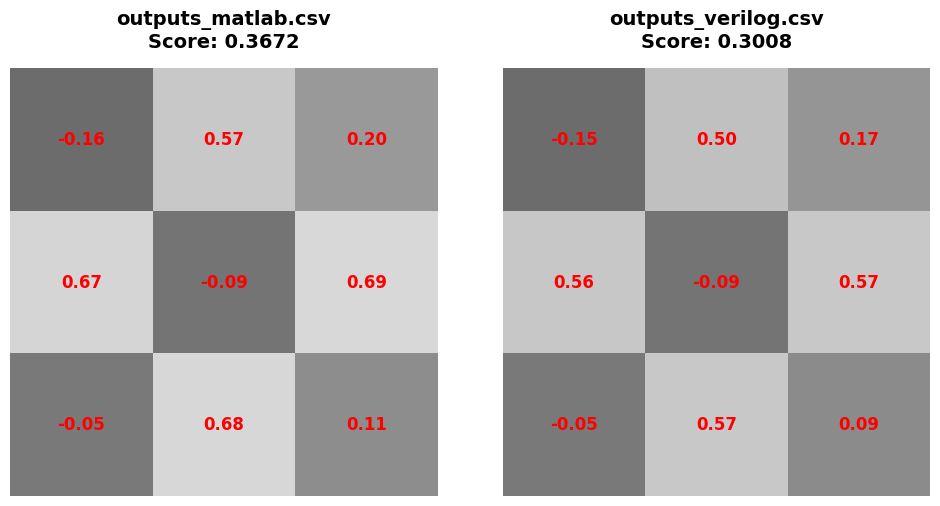

In [28]:
visualize_output([
    'data/outputs_matlab.csv', 
    'data/outputs_verilog.csv'
])